In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
load("environment/real_datasets/GSE100505/mapDf.RData")
dir <- "environment/real_datasets/GSE100505/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/comp_trees"
gene_dir <- "real_datasets/GSE100505/mode=gcbias/post_type=gibbs_nreps=100_tf=100/gene_dir"
load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

In [2]:
suppressPackageStartupMessages(library(biomaRt))
ensembl <- useEnsembl(biomart = "genes", dataset = "mmusculus_gene_ensembl", version = 101)

In [3]:
allGenes <- genesCons[[1]]
rGenes <- gsub("\\.[0-9]+", "", allGenes)

In [5]:
# gene_family <- getBM(attributes=c("ensembl_gene_id", "description", "family"), values = rGenes, filters="ensembl_gene_id", mart=ensembl)
# save(gene_family, file = file.path(dir, "gene_family_df.RData"))

In [6]:
load(file.path(dir, "gene_family_df.RData"))

In [7]:
length(rGenes) ## All genes in the table
sum(!rGenes %in% gene_family$ensembl_gene_id)

[1] 27280

[1] 0

In [8]:
##Mapping gene to family
geneFam <- lapply(rGenes, function(gene) {
    unique(gene_family[gene_family$ensembl_gene_id==gene,"family"])
})
names(geneFam) <- rGenes
table(sapply(geneFam,length))
geneFam <- lapply(geneFam, function(fams) {
    if(length(fams) > 1)
        fams <- fams[fams!=""]
    fams
})
table(sapply(geneFam,length)) ## Around 440 genes that map to more than 1 family


    1     2     3     4     5 
14765 12147   348    17     3 


    1     2     3     4 
26831   426    19     4 

In [9]:
geneEmptyFam <- rGenes[sapply(geneFam, function(fam) sum(fam == "")==1&length(fam==1))]
length(geneEmptyFam)
sum(unlist(geneFam[geneEmptyFam])!="") ## should be 0 so that all empty genes are marked out

[1] 10261

[1] 0

In [11]:
gList <- list(genesCor, genesCons, genesCons0, genesThr, genesMeanInf0)
sapply(gList, length)

[1] 68061 69404 78978 10928 82685

Nodes that contain atleast 1 empty gene

In [12]:
sapply(gList, function(gL) sum(sapply(gL, function(genes) sum(gsub("\\.[0-9]+", "", genes) %in% geneEmptyFam) > 0)))

[1] 23207  8527 11993  1685 15063

In [13]:
### All Nodes that map entirely to "" families have to be removed
removeNodes <- list()
for(i in seq(gList)) {
    gL <- gList[[i]]
    removeNodes[[i]] <- which(sapply(gL, function(genes) 
        sum(gsub("\\.[0-9]+", "", genes) %in% geneEmptyFam) == length(genes)))
    removeNodes[[i]] <- c(1, removeNodes[[i]])## Also adding root
}
sapply(removeNodes, length)

[1] 1168 3919 4662 1175 4206

In [14]:
multiFamGenes <- names(geneFam)[sapply(geneFam,length)>1]
length(multiFamGenes)
l <- length(rGenes)
### nodes that will be considered for hitting set, 
### if there is only 1 gene then we should not be concerned even if a gene is multimapping 
multInds <- lapply(gList, function(gL) {
        which(sapply(gL, function(genes) sum(gsub("\\.[0-9]+", "", genes) %in% multiFamGenes) > 0 & length(genes) > 1 & l!=length(genes)))
})

sapply(multInds, length)

[1] 449

[1] 8629  518  698   45 1490

In [15]:
getInpForHittingSet <- function(genes, geneMap, emptyGeneSet) {
    genes <- gsub("\\.[0-9]+", "", genes)
    genes <- setdiff(genes, emptyGeneSet)
    fams <- unique(unlist(geneMap[genes]))
    geneFamsList <- geneMap[genes]
    gsets <- sapply(geneFamsList, function(fam) paste(match(fam, fams), collapse=" "))
    return(gsets)

}

In [31]:
i <- 1
length(multInds[[i]])
fname <- "corHitInp.txt"
gL <- gList[[i]]
cList <- multInds[[i]]
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 8629

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [30]:
i <- 2
length(multInds[[i]])
fname <- "consHitInp.txt"
gL <- gList[[i]]
cList <- multInds[[i]]
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 518

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [29]:
i <- 3
length(multInds[[i]])
fname <- "cons0HitInp.txt"
gL <- gList[[i]]
cList <- multInds[[i]]
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 698

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [27]:
i <- 4
length(multInds[[i]])
fname <- "thrHitInp.txt"
gL <- gList[[i]]
cList <- multInds[[i]]
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 45

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45


In [28]:
i <- 5
length(multInds[[i]])
fname <- "meanHitInp.txt"
gL <- gList[[i]]
cList <- multInds[[i]]
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 1490

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [16]:
### Reading gene family lengths
gnames <- c("Cor","Cons","Cons0","Thr","Mean")
files <- file.path(gene_dir,paste("hit", gnames, ".txt", sep=""))
hitFam <- lapply(files, function(file) read.delim(file, header=F))
names(hitFam) <- gnames

In [17]:
singleGeneInds <- lapply(gList, function(gL) which(sapply(gL, length)==1))
sapply(singleGeneInds,length)
singleGeneInds <- lapply(seq_along(gList), function(i) setdiff(singleGeneInds[[i]], removeNodes[[i]]))
sapply(singleGeneInds,length)

[1] 20319 60561 66402  8969 66106

[1] 19716 58571 63950  8781 63600

In [18]:
geneFamilyLength <- lapply(gList, function(gL) rep(0, length(gL)))
geneFamilyLength <- lapply(seq_along(geneFamilyLength), function(i) {
    gL <- geneFamilyLength[[i]]
    gL[singleGeneInds[[i]]] <- 1
    gL
})

In [19]:
sapply(seq_along(geneFamilyLength), function(i) length(intersect(singleGeneInds[[i]], multInds[[i]]))) ### should be 0
geneFamilyLength <- lapply(seq_along(geneFamilyLength), function(i) {
    gL <- geneFamilyLength[[i]]
    inds <- multInds[[i]]
    if(length(inds) == dim(hitFam[[i]])[1])
    gL[inds] <- hitFam[[i]][,1]
    gL
})

[1] 0 0 0 0 0

In [20]:
remInds <- lapply(seq_along(geneFamilyLength), function(i) {
    inds <- setdiff(seq_along(geneFamilyLength[[i]]), 
                    Reduce(union, list(singleGeneInds[[i]], multInds[[i]], removeNodes[[i]])))
    inds <- inds[2:length(inds)] ##dont want root
})
sapply(remInds,length)

[1] 38547  6395  9667   926 13388

In [33]:
sapply(geneFamilyLength,table)

[[1]]

    0     1     2     3     4     5     6     7     8     9    10    11    12 
39716 19964  1207   598   737   391   393   431   322   208   202   211   214 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
  188   155   119   140   124   109    88    87    75   104    71    63    74 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
   65    68    40    50    43    49    42    42    46    41    35    32    30 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
   44    37    34    23    25    24    23    21    28    25    26    16    15 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
   31    15    19    11    28    20    22    11    17    13    15    19    12 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
   12    15     9    13    12     5    11    10    17     7    11    16    14 
   78    79    80    81    82    83    84    

In [21]:
geneFamilyLength <- lapply(seq_along(remInds), function(i) {
    gL <- gList[[i]]
    gLength <- geneFamilyLength[[i]]
    rInds <- remInds[[i]]
    lengths <- sapply(rInds, function(ind) {
        genes <- gsub("\\.[0-9]+", "", gL[[ind]])
        fams <- geneFam[genes]
        if(sum(sapply(fams, length) != 1)!=0) {
            print(fams)
            stop("err")
        }
            
        length(unique(fams))
    })
    gLength[rInds] <- lengths
    gLength
})

In [22]:
sapply(geneFamilyLength,table)

[[1]]

    0     1     2     3     4     5     6     7     8     9    10    11    12 
 1169 20165 19238  4527  7033  2271  1750  1979  1686   804   659   608   630 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
  499   428   328   311   235   217   186   192   148   167   133   113   112 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
  109   105    73    75    64    68    55    62    65    58    53    55    42 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
   56    47    42    28    29    30    26    25    29    28    29    19    16 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
   32    17    20    16    29    22    23    14    19    15    17    20    15 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
   12    15     9    13    13     5    12    12    17     8    12    16    16 
   78    79    80    81    82    83    84    

In [23]:
geneFamilyLength <- lapply(geneFamilyLength, function(len) len[len!=0])
sapply(geneFamilyLength,table)

[[1]]

    1     2     3     4     5     6     7     8     9    10    11    12    13 
20165 19238  4527  7033  2271  1750  1979  1686   804   659   608   630   499 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  428   328   311   235   217   186   192   148   167   133   113   112   109 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
  105    73    75    64    68    55    62    65    58    53    55    42    56 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   47    42    28    29    30    26    25    29    28    29    19    16    32 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
   17    20    16    29    22    23    14    19    15    17    20    15    12 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
   15     9    13    13     5    12    12    17     8    12    16    16    13 
   79    80    81    82    83    84    85    

In [24]:
i <- 1
bins <- c(1,2,4,10,100,500,1000,12000)
dfFam <- data.frame(lab = bins, Type = "AC", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    dfFam[["nFam"]][j] <- sum(inds)
    
}

i <- 2
df <- data.frame(lab = bins, Type = "ConsFilt", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 3
df <- data.frame(lab = bins, Type = "Cons", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 4
df <- data.frame(lab = bins, Type = "ConsFiltES", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 5
df <- data.frame(lab = bins, Type = "Mean", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

In [30]:
dfFamReal <- dfFam
save(dfFamReal, file = file.path(dir, "dfFamReal.RData"))

In [29]:
file.path(dir, "dfFamReal.RData")

[1] "environment/real_datasets/GSE100505/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/comp_trees/dfFamReal.RData"

Warning message:
"Transformation introduced infinite values in continuous y-axis"


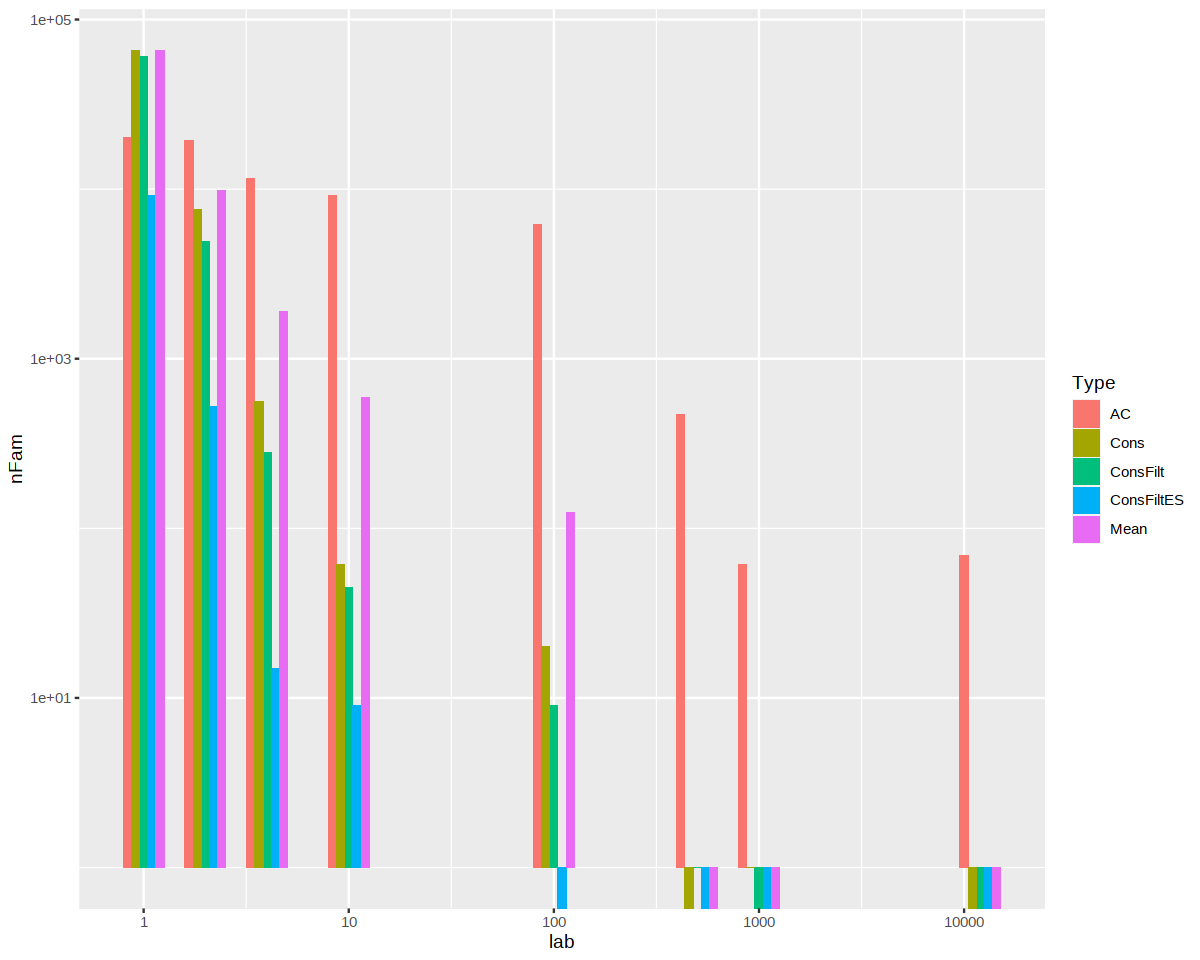

In [43]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(dfFam, aes(x=lab, y=nFam, fill=Type)) + 
    geom_bar(stat="identity", position="dodge", width = 0.2) + 
    scale_y_continuous(trans='log10') +
    scale_x_continuous(trans='log10')

In [39]:
dfFam

lab,Type,nFam
<dbl>,<chr>,<dbl>
1,AC,20165
2,AC,19238
4,AC,11560
10,AC,9149
100,AC,6183
500,AC,467
1000,AC,61
12000,AC,69
1,ConsFilt,60267


In [45]:
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "treeThr.RData"))

In [46]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFilt", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Cons", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="AC", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Mean", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="ConsFiltES", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 5,"depth"]=5

In [ ]:
i <- 1
bins <- c(1,2,4,10,100,500,1000,12000)
dfN <- data.frame(lab = bins, Type = "AC", nFam = 0, depth = rep(c(2:5), length(bins)))
for(j in seq(bins)) {
    dfNGenes %>% filter(Type=="AC")
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    dfFam[["nFam"]][j] <- sum(inds)
    
}

i <- 2
df <- data.frame(lab = bins, Type = "ConsFilt", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 3
df <- data.frame(lab = bins, Type = "Cons", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 4
df <- data.frame(lab = bins, Type = "ConsFiltES", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 5
df <- data.frame(lab = bins, Type = "Mean", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

In [ ]:
dfNGenes %>% filter(Type=="AC") %>%

In [31]:
head(gene_family)

,ensembl_gene_id,description,family
,<chr>,<chr>,<chr>
1,ENSMUSG00000064368,mitochondrially encoded NADH dehydrogenase 6 [Source:MGI Symbol;Acc:MGI:102495],PTHR11435
2,ENSMUSG00000066620,predicted gene 4883 [Source:MGI Symbol;Acc:MGI:3643348],
3,ENSMUSG00000065608,microRNA let7c-2 [Source:MGI Symbol;Acc:MGI:3619050],
4,ENSMUSG00000065254,"predicted gene, 23973 [Source:MGI Symbol;Acc:MGI:5453750]",
5,ENSMUSG00000064646,"predicted gene, 23300 [Source:MGI Symbol;Acc:MGI:5453077]",
6,ENSMUSG00000065289,"predicted gene, 23650 [Source:MGI Symbol;Acc:MGI:5453427]",
